In [12]:
from langgraph.graph import StateGraph, START,END
from typing import TypedDict
import dotenv
from langchain.chat_models import init_chat_model
dotenv.load_dotenv()  # Load environment variables from .env file


True

In [13]:
class llm_workflow_state(TypedDict):
    user_input: str
    llm_response: str

In [14]:
graph = StateGraph(llm_workflow_state)

In [15]:
import os
os.environ["GOOGLE_API_KEY"] = os.getenv("GOOGLE_API_KEY","")
def llm_node(state:llm_workflow_state)->llm_workflow_state:
    
    model = init_chat_model("google_genai:gemini-2.5-flash-lite")
    prompt = state['user_input']
    response = model.invoke(prompt).content
    state['llm_response'] = response
    return state

In [16]:
graph.add_node('llm_node', llm_node)

In [17]:
graph.add_edge(START,'llm_node')
graph.add_edge('llm_node', END)


In [18]:
workflow = graph.compile()

In [19]:
final_state = workflow.invoke({'user_input': 'What is the capital of France?'})
print(final_state)

{'user_input': 'What is the capital of France?', 'llm_response': 'The capital of France is **Paris**.'}


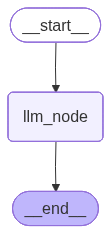

In [20]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())